# Проверка гипотезы в Python и составление аналитической записки

- Автор: Гена Гордиевский
- Дата: 10.03.2025

## Цели и задачи проекта

Необходимо проверить гипотезу о активности пользователей из Санкт-Петербурга и Москвы. Посмотреть наличие дубликатов в идентификаторах пользователей. Сравнить размеры групп, их статистики и распределение.

## Описание данных

Данные включают в себя следующее: 

puid - идентификатор пользователя;

hours - количество часов активности;

city - город активности пользователя.

## Содержимое проекта

- Подключение библиотек;

- Загрузка данных;

- Просмотр данных;

- Проверка на дубликаты;

- Проверка распределения данных;

- Проверка гипотез.

## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
PATH = "https://code.s3.yandex.net/datasets/" #Сделаем как ссылку
knigi = pd.read_csv(PATH + 'yandex_knigi_data.csv')

In [3]:
display(knigi.head())

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


In [4]:
display(knigi.describe())

,Unnamed: 0,puid,hours
count,8784.000000,8.784000e+03,8784.000000
mean,4391.500000,1.029234e+13,11.087670
std,2535.866716,1.073532e+14,37.701350
min,0.000000,9.668000e+03,0.000018
25%,2195.750000,3.239271e+08,0.066246
50%,4391.500000,8.828218e+08,0.942344
75%,6587.250000,1.516464e+09,6.065151
max,8783.000000,1.130000e+15,978.764775


In [5]:
# Проверяем на дубликаты
duplicates = knigi[knigi.duplicated(subset='puid', keep=False)]
duplicate_count = knigi['puid'].duplicated(keep=False).sum()
display("Дубликаты по идентификаторам пользователей:", duplicates)
display("Количество дубликатов в идентификаторах пользователей:", duplicate_count)

'Дубликаты по идентификаторам пользователей:'

,Unnamed: 0,city,puid,hours
35,35,Москва,2637041,10.317371
134,134,Москва,9979490,32.415573
145,145,Москва,10597984,42.931506
150,150,Москва,10815097,9.086655
187,187,Москва,13626259,21.104167
...,...,...,...,...
8771,8771,Санкт-Петербург,1130000018516717,0.517778
8772,8772,Санкт-Петербург,1130000018954257,33.583294
8773,8773,Санкт-Петербург,1130000020425037,2.386944
8775,8775,Санкт-Петербург,1130000023864516,14.384722


'Количество дубликатов в идентификаторах пользователей:'

488

In [6]:
# Размеры групп пользователей по городам
group_sizes = knigi['city'].value_counts()
display("Размеры групп:", group_sizes)


'Размеры групп:'

Москва             6234
Санкт-Петербург    2550
Name: city, dtype: int64

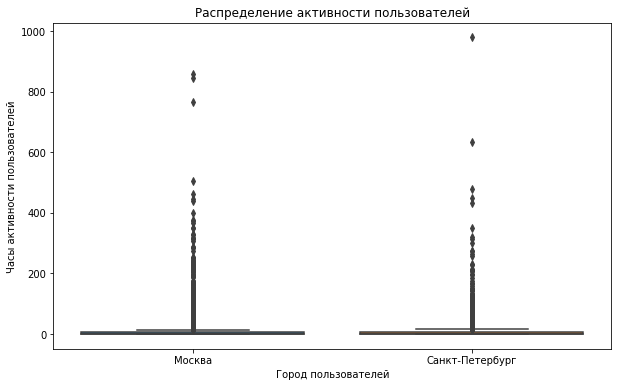

In [7]:
# Построим диаграмму "ящик с усами", посмотрим выбросы
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='hours', data=knigi)
plt.title('Распределение активности пользователей')
plt.xlabel('Город пользователей')
plt.ylabel('Часы активности пользователей')
plt.xticks(rotation=0)
plt.show()

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в Санкт-Петербурге не выше, чем средняя активность пользователей в Москве.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге выше, чем средняя активность пользователей в Москве.

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


'Данные для Москвы не распределены нормально.'

'Данные для Санкт-Петербурга не распределены нормально.'

Text(0.5, 1.0, 'Q-Q график для Санкт-Петербурга')

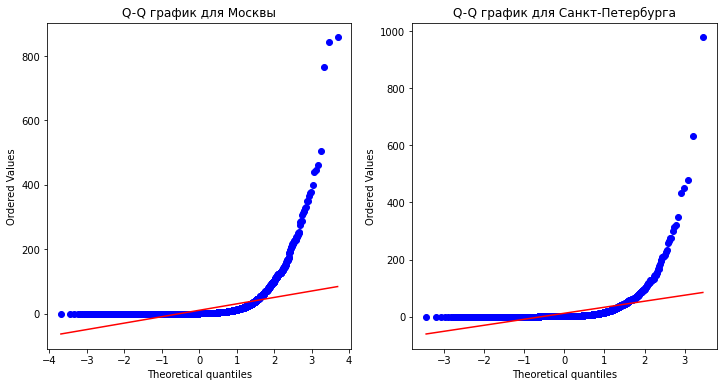

In [8]:
# Проверим нормальность распредление данных
moscow_hours = knigi[knigi['city'] == 'Москва']['hours']
spb_hours = knigi[knigi['city'] == 'Санкт-Петербург']['hours']

# Тест Шапиро-Уилка для проверки нормальности
shapiro_moscow = stats.shapiro(moscow_hours)
shapiro_spb = stats.shapiro(spb_hours)

# Вывод по гипотезе
alpha = 0.05
if shapiro_moscow.pvalue < alpha:
    display("Данные для Москвы не распределены нормально.")
else:
    display("Данные для Москвы распределены нормально.")

if shapiro_spb.pvalue < alpha:
    display("Данные для Санкт-Петербурга не распределены нормально.")
else:
    display("Данные для Санкт-Петербурга распределены нормально.")

# Построим Q-Q графики (для более понятного восприятия)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(moscow_hours, dist="norm", plot=plt)
plt.title('Q-Q график для Москвы')

plt.subplot(1, 2, 2)
stats.probplot(spb_hours, dist="norm", plot=plt)
plt.title('Q-Q график для Санкт-Петербурга')


In [9]:
moscow_hours = knigi[knigi['city'] == 'Москва']['hours']
spb_hours = knigi[knigi['city'] == 'Санкт-Петербург']['hours']

# Проведем t-тест для независимых выборок
t_stat, p_value = stats.ttest_ind(moscow_hours, spb_hours,  alternative='less')

# Уровень значимости
alpha = 0.05

# Результат
display(f'P-value для t-теста: {p_value}')

# Вывод по гипотезе
if p_value < alpha:
    display("Отвергаем нулевую гипотезу: различия между группами статистически значимы.")
else:
    display("Не можем отвергнуть нулевую гипотезу: различия между группами не статистически значимы.")



'P-value для t-теста: 0.21101894136116772'

'Не можем отвергнуть нулевую гипотезу: различия между группами не статистически значимы.'

## 3. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



Для проверки нормальности распределения данных применялся тест Шапиро-Уилка. Он показал нам, что данные не распределены нормально. После был проведена односторонняя проверка гипотезы (t-тест), в которой p-value=0.7889(), что больше alpha=0,05, это говорит о необходимости отвергнуть нулевую гипотезу (часов активности в СПБ не больше чем в МСК).
Возможные причины:
- В питере больше читают или слушают книги;
- Могут быть ошибки в обработке данных, выбраны не правильные методы проверки.
